In [1]:
from datetime import date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

# Load data

In [2]:
%run get_data.ipynb

Top market cap symbols saved to data/top_cap.csv


Processing currencies: 100%|██████████| 58/58 [00:40<00:00,  1.44it/s]

Historical data saved to data/data.csv
Data range: 2024-03-11 00:00:00 to 2025-06-19 00:00:00


In [3]:
TODAY = date.today().strftime('%Y-%m-%d')
TODAY

'2025-06-19'

In [4]:
cap_df = pd.read_csv('data/top_cap.csv')
cap_df

,symbol,name,cap
0,BTCUSDT,Bitcoin,2076134136286
1,ETHUSDT,Ethereum,303384910585
2,USDTUSDT,Tether,155733719061
3,XRPUSDT,XRP,128027167075
4,BNBUSDT,BNB,93892867816
...,...,...,...
95,ABUSDT,AB,947198477
96,PYUSDUSDT,PayPal USD,947141987
97,STXUSDT,Stacks,946186040
98,XDCUSDT,XDC Network,935028344


In [5]:
df = pd.read_csv('data/data.csv')
df_vol = df[['timestamp', 'symbol', 'volume']].copy()

df_vol = df_vol.pivot(index='timestamp', columns='symbol', values='volume')
df_vol = df_vol.dropna(axis=1, how='any')
df_vol

symbol,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,SUIUSDT,TIAUSDT,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-03-11,313911.963,320630328.7,210258284.0,5192868.32,108623349.2,5781455.71,8911493.52,232768.146,1608146.397,4.167980e+12,...,61375310.3,3502310.60,4.910934e+08,4348900.95,1.334545e+09,736555944.4,48.17759,28733173.3,501786255.0,2.035921e+09
2024-03-12,310122.850,227151117.0,202269950.0,5029153.70,102885481.9,5491243.58,12915245.00,270855.788,1924767.687,3.826496e+12,...,87289396.5,11841505.30,4.688844e+08,4443993.32,1.271673e+09,730024555.1,25.96274,28459680.6,252048264.0,1.164823e+09
2024-03-13,388628.619,168550753.8,157047646.0,4439074.83,168992357.0,4383579.57,5785825.53,231275.949,2526002.564,6.203536e+12,...,69903768.9,4662934.80,3.706200e+08,3590830.86,8.459919e+08,584604967.4,27.69368,14008121.0,172541066.0,6.297180e+08
2024-03-14,259652.689,416026694.0,131096846.0,11493172.84,132983062.4,7020397.90,7732957.59,372276.878,2119540.300,1.116602e+13,...,80903781.3,4389136.70,5.403736e+08,4157084.01,1.255126e+09,698780996.4,32.80282,31000794.2,238927418.0,8.669132e+08
2024-03-15,292127.414,342389407.2,144693570.0,11877670.80,135415738.5,7474377.89,11735553.58,193041.267,3066312.788,7.703105e+12,...,118382583.3,6338611.00,6.954924e+08,5616115.09,1.329242e+09,909692032.7,93.69061,34799385.8,256046099.0,1.046570e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-15,98219.224,44666279.5,22414180.0,2474883.89,60734814.2,891381.76,1025408.30,75780.609,79324.646,8.434405e+11,...,27407251.2,5708376.81,1.557125e+08,5834362.72,5.044200e+08,129454002.0,55.75567,11827761.2,21441243.0,4.659562e+07
2025-06-16,249880.545,99602152.2,28578696.0,3471978.49,89399833.0,1232673.82,2053892.52,84831.992,124203.787,1.030581e+12,...,43292182.4,8507997.52,1.149785e+09,15493186.39,1.424853e+09,183643358.4,132.61558,31540535.0,58093957.0,1.807758e+08
2025-06-17,286884.273,110370304.8,43625424.0,4234107.06,104111058.2,1373051.61,2290731.00,85599.488,182982.263,1.249334e+12,...,56990075.2,12341462.93,5.777693e+08,13669402.65,9.968086e+08,226841839.3,145.03784,55346473.3,48820207.0,1.459980e+08


In [6]:
df = df[['timestamp', 'symbol', 'close']]

df = df.pivot(index='timestamp', columns='symbol', values='close')
df = df.dropna(axis=1, how='any')
df


symbol,AAVEUSDT,ADAUSDT,ALGOUSDT,APTUSDT,ARBUSDT,ATOMUSDT,AVAXUSDT,BCHUSDT,BNBUSDT,BONKUSDT,...,SUIUSDT,TIAUSDT,TRXUSDT,UNIUSDT,USDCUSDT,VETUSDT,WBTCUSDT,WLDUSDT,XLMUSDT,XRPUSDT
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-03-11,136.74,0.7754,0.2918,13.4636,2.0830,13.705,49.09,448.4,523.00,0.000031,...,1.5717,16.520,0.13372,14.437,0.9997,0.05040,72230.43,9.834,0.1576,0.7230
2024-03-12,135.36,0.7481,0.3178,13.3756,2.0173,13.410,55.48,435.0,537.50,0.000029,...,1.5993,17.940,0.13142,14.063,0.9998,0.04873,71467.48,10.149,0.1493,0.6880
2024-03-13,142.69,0.7638,0.3187,13.1493,2.1152,14.114,54.79,442.5,630.50,0.000032,...,1.6212,17.240,0.13194,14.227,0.9994,0.04912,72974.23,9.549,0.1508,0.6891
2024-03-14,139.42,0.7509,0.3118,14.2970,2.0155,13.680,53.95,440.5,603.20,0.000034,...,1.5672,16.520,0.12913,13.947,1.0002,0.04730,71122.10,10.774,0.1445,0.6690
2024-03-15,129.13,0.7274,0.2992,15.1265,1.8879,12.634,58.36,416.7,632.70,0.000030,...,1.4927,15.350,0.12633,13.066,0.9999,0.04462,69184.68,9.745,0.1369,0.6342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-15,274.97,0.6334,0.1766,4.5380,0.3278,4.093,19.10,460.4,648.19,0.000015,...,3.0233,1.757,0.27390,7.180,0.9997,0.02226,105570.71,0.980,0.2587,2.1655
2025-06-16,275.12,0.6303,0.1759,4.6850,0.3185,4.141,19.06,463.7,650.74,0.000015,...,2.9962,1.719,0.27410,7.446,0.9994,0.02221,106733.71,0.959,0.2616,2.2380
2025-06-17,266.56,0.6090,0.1695,4.4440,0.3033,4.021,18.58,462.6,648.08,0.000014,...,2.8326,1.655,0.27150,7.438,0.9997,0.02143,104550.17,0.910,0.2519,2.1590


# Solver

In [7]:
def find_optimal_parameters(df, symbol_list=None, 
                            min_last_days=90, max_last_days=180, step_day=10,
                            min_procent=0.01, max_procent=0.3, step_procent=0.01,
                            min_std_procent=0.01, max_std_procent=0.3, step_std=0.01):
    results = {}

    if symbol_list is None:
        symbol_list = df.columns.tolist()

    for symbol in tqdm(symbol_list, desc='Processing Symbols'):
        optimal_procent = max_procent
        optimal_last_days = min_last_days
        optimal_std_procent = max_std_procent

        last_price = df[symbol].iloc[-1]

        for last_days in range(min_last_days, max_last_days + 1, step_day):
            df_slice = df[symbol].iloc[-last_days:]
            mean_val = df_slice.mean()
            df_warning_100 = df[symbol].iloc[-100:]
            df_warning_30 = df[symbol].iloc[-30:]

            for std_procent in np.arange(max_std_procent, min_std_procent, -step_std):
                std_n = mean_val * std_procent

                for procent in np.arange(max_procent, min_procent, -step_procent):
                    min_historical = df[symbol].min()
                    min_historical_coeff = min_historical * (procent + 1.0)
                    min_support_100 = df_warning_100.min()
                    min_support_30 = df_warning_30.min()
                    max_historical = df[symbol].max()
                    max_resist_100 = df_warning_100.max()
                    max_resist_30 = df_warning_30.max()
                    mean_100 = df_warning_100.mean()
                    mean_30 = df_warning_30.mean()

                    if (df_slice.std() <= std_n) and (mean_val <= min_historical_coeff) and (last_price >= min_support_30):

                        if (procent < optimal_procent or
                            (procent == optimal_procent and last_days > optimal_last_days) or
                            (procent == optimal_procent and last_days == optimal_last_days and std_procent < optimal_std_procent)):
                            optimal_procent = procent
                            optimal_last_days = last_days
                            optimal_std_procent = std_procent

        if symbol != 'BTCUSDT':
            if (optimal_procent == max_procent) & (optimal_last_days == min_last_days) & (optimal_std_procent == max_std_procent):
                continue

        results[symbol] = (optimal_procent, optimal_last_days, optimal_std_procent, 
                           min_support_100, min_support_30, min_historical, 
                           max_historical, max_resist_100, max_resist_30, 
                           last_price, mean_100, mean_30)

    results = pd.DataFrame(results).T
    results.columns = ['Optimal Procent', 'Optimal Last Days', 'Optimal Std Procent', 
                       'Min Support 100', 'Min Support 30', 'Min Historical', 
                       'Max Historical', 'Max Resist 100', 'Max Resist 30', 
                       'Last Price', 'Mean 100', 'Mean 30']
    results = results.sort_values(by=['Optimal Procent', 'Optimal Last Days', 'Optimal Std Procent'], 
                                    ascending=[True, False, False])

    return results

In [8]:
optimal_symbol = find_optimal_parameters(df)

Processing Symbols: 100%|██████████| 43/43 [00:24<00:00,  1.79it/s]


In [9]:
ignore_symbols = ['USDCUSDT', 'FDUSDUSDT']
optimal_symbol = optimal_symbol[~optimal_symbol.index.isin(ignore_symbols)]

In [10]:
optimal_symbol

,Optimal Procent,Optimal Last Days,Optimal Std Procent,Min Support 100,Min Support 30,Min Historical,Max Historical,Max Resist 100,Max Resist 30,Last Price,Mean 100,Mean 30
ICPUSDT,0.15,90.0,0.08,4.587000,4.792000,4.587000,19.019000,6.199000,6.177000,5.025000,5.278450,5.335533
APTUSDT,0.18,90.0,0.09,4.348000,4.369000,4.348000,18.070200,6.138000,5.715000,4.369000,5.144430,4.895100
FILUSDT,0.20,90.0,0.09,2.266000,2.344000,2.266000,11.180000,3.245000,3.085000,2.344000,2.730450,2.617200
ETCUSDT,0.22,90.0,0.09,14.070000,16.290000,14.070000,38.270000,20.700000,19.690000,16.720000,17.202700,17.545333
SHIBUSDT,0.24,110.0,0.10,0.000011,0.000012,0.000011,0.000034,0.000017,0.000016,0.000012,0.000013,0.000013
DOTUSDT,0.24,100.0,0.10,3.378000,3.555000,3.378000,11.558000,5.309000,4.948000,3.555000,4.183420,4.140367
ATOMUSDT,0.25,120.0,0.08,3.887000,4.014000,3.580000,14.114000,5.384000,5.219000,4.039000,4.486510,4.424933
NEXOUSDT,0.28,110.0,0.09,0.954000,1.210000,0.914000,1.550000,1.302000,1.293000,1.211000,1.166440,1.240300
OPUSDT,0.28,90.0,0.13,0.559000,0.559000,0.559000,4.583000,0.921000,0.812000,0.560000,0.727580,0.662433
AVAXUSDT,0.29,110.0,0.11,16.040000,18.010000,16.040000,60.650000,25.820000,25.260000,18.010000,20.672500,21.084333


In [11]:
result = optimal_symbol.index.to_list()

In [12]:
result = result[:10]
result

['ICPUSDT',
 'APTUSDT',
 'FILUSDT',
 'ETCUSDT',
 'SHIBUSDT',
 'DOTUSDT',
 'ATOMUSDT',
 'NEXOUSDT',
 'OPUSDT',
 'AVAXUSDT']

# Побудова графіку

In [ ]:
def paint_result(df, result, info_df, cap_df, volume_df, last_days=365):
    num_symbols = len(result)
    fig, axes = plt.subplots(nrows=num_symbols, ncols=1, figsize=(16, 6 * num_symbols), sharex=False)

    if num_symbols == 1:
        axes = [axes]

    global_norm = pd.DataFrame()
    for symbol in result:
        series = df[symbol].iloc[-last_days:]
        norm_series = (series - series.min()) / (series.max() - series.min())
        global_norm[symbol] = norm_series
    global_line = global_norm.mean(axis=1)

    for idx, symbol in enumerate(result):
        series = df[symbol].iloc[-last_days:]
        volume_series = volume_df[symbol].iloc[-last_days:]
        ax = axes[idx]

        # ==== Графік ціни ====
        series.plot(ax=ax, label='Price', color='gray', linewidth=1.5)

        # ==== Глобальна лінія ====
        global_scaled = global_line * (series.max() - series.min()) + series.min()
        global_scaled.plot(ax=ax, label='Global Mean', color='black', linestyle='dotted', linewidth=0.5)

        # ==== 100-денна ковзна ====
        ma100_full = df[symbol].rolling(window=100).mean()
        ma100 = ma100_full.iloc[-last_days:]
        ma100.plot(ax=ax, color='blue', linestyle='-', linewidth=1.2, label='MA 100')

        ma100_global = global_scaled.rolling(window=100).mean()
        ma100_global.plot(ax=ax, color='blue', linestyle='dotted', linewidth=0.5, label='Global MA 100')
        # ==== 30-денна ковзна ====
        ma30_full = df[symbol].rolling(window=30).mean()
        ma30 = ma30_full.iloc[-last_days:]
        ma30.plot(ax=ax, color='orange', linestyle='-', linewidth=1.2, label='MA 30')

        # ==== Лінії підтримки та опору ====
        symbol_cap = cap_df[cap_df['symbol'] == symbol]['cap'].values[0] / 1_000_000_000
        min_support_100 = info_df.loc[symbol, 'Min Support 100']
        max_resist_100 = info_df.loc[symbol, 'Max Resist 100']
        min_support_30 = info_df.loc[symbol, 'Min Support 30']
        max_resist_30 = info_df.loc[symbol, 'Max Resist 30']
        last_price = info_df.loc[symbol, 'Last Price']

        # ==== Розрахунок TP та SL ====
        TP = (max_resist_100 + max_resist_30) / 2
        profit_pct = ((TP - last_price) / last_price) * 100
        min_historical = info_df.loc[symbol, 'Min Historical']
        SL = min_historical * 0.8

        # ==== Фарбування ділянок підтримки та опору ====
        ax.axhspan(min_support_100, max_resist_100, color='lightgreen', alpha=0.1)
        ax.axhspan(max_resist_30, max_resist_100, color='red', alpha=0.1)

        ax.axhline(last_price, color='green', linestyle='--',
                   label=f"Last Price ({last_price:.2f})")
        ax.text(series.index[-1], last_price, f' {last_price:.2f}', 
                verticalalignment='bottom', color='green', fontsize=10)
        
        ax.axhline(min_support_100, color='gray', linestyle='dotted',
                   label=f"Min Support 100 ({min_support_100:.2f})")
        ax.axhline(min_support_30, color='orange', linestyle='--',
                   label=f"Min Support 30 ({min_support_30:.2f})")

        ax.axhline(max_resist_100, color='gray', linestyle='dotted',
                   label=f"Max Resist 100 ({max_resist_100:.2f})")
        ax.axhline(max_resist_30, color='gray', linestyle='dotted',
                   label=f"Max Resist 30 ({max_resist_30:.2f})")
        
        ax.axhline(info_df.loc[symbol, 'Min Historical'], color='red', linestyle='--',
                   label=f"Min Historical ({info_df.loc[symbol, 'Min Historical']:.2f})")
        ax.axhline(info_df.loc[symbol, 'Max Historical'], color='red', linestyle='--',
                   label=f"Max Historical ({info_df.loc[symbol, 'Max Historical']:.2f})")

        # ==== Найбільший обʼєм за останні 100 днів ====
        vol_max_idx_100 = volume_series[-100:].idxmax()
        vol_mean_100 = volume_series[-100:].mean()
        if volume_series[vol_max_idx_100] > vol_mean_100 * 3:
            price_at_vol_max_100 = series.loc[vol_max_idx_100]
            pos_100 = series.index.get_loc(vol_max_idx_100)

            ax.text(pos_100, price_at_vol_max_100, f' {price_at_vol_max_100:.2f}', 
                    verticalalignment='bottom', color='red', fontsize=10)

        # ==== Найбільший обʼєм за останні 30 днів ====
        vol_max_idx_30 = volume_series[-30:].idxmax()
        vol_mean_30 = volume_series[-30:].mean()
        if volume_series[vol_max_idx_30] > vol_mean_30 * 3:
            price_at_vol_max_30 = series.loc[vol_max_idx_30]
            pos_30 = series.index.get_loc(vol_max_idx_30)

            ax.text(pos_30, price_at_vol_max_30, f' {price_at_vol_max_30:.2f}', 
                    verticalalignment='bottom', color='red', fontsize=10)

        # ==== Лінії часу ====
        if len(series) >= 100:
            pos_30 = len(series) - 30
            pos_100 = len(series) - 100
            
            ax.axvline(pos_30, color='gray', linestyle=':', label='30 Days Ago')
            ax.axvline(pos_100, color='gray', linestyle=':', label='100 Days Ago')

        # ==== Накладання обʼєму ====
        ax.set_title(f"{symbol} ({symbol_cap:.2f}B USD) — Potential Profit: {profit_pct:.2f}% (SL: {SL:.2f}, TP: {TP:.2f})", fontsize=14)
        ax.legend(loc='upper left', fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.5)

        lower_limit = min_support_100 * 0.9
        upper_limit = max_resist_100 * 1.1
        ax.set_ylim(lower_limit, upper_limit)
        vol_scaled = volume_series / volume_series.max() * (upper_limit - lower_limit) * 0.2 + lower_limit
        ax.fill_between(vol_scaled.index, vol_scaled, color='gray', alpha=0.3, label='Volume (scaled)')

    plt.tight_layout()
    plt.savefig(f'pdf_store/{TODAY}.pdf', dpi=300, bbox_inches='tight')
    try:
        plt.savefig(f'/Users/aleksejkitajskij/Library/Mobile Documents/com~apple~CloudDocs/bit_research/{TODAY}.pdf', dpi=300, bbox_inches='tight')
    except Exception as e:
        print(f"Error saving PDF to iCloud")
    plt.show()

In [14]:
def paint_all(df, symbols, last_days=365):
    data = df[symbols].iloc[-last_days:].copy()

    for symbol in symbols:
        series = data[symbol]
        min_val = series.min()
        max_val = series.max()
        data[symbol] = (series - min_val) / (max_val - min_val)

    plt.figure(figsize=(16,8))
    x = range(len(data))
    for symbol in symbols:
        plt.plot(x, data[symbol], label=symbol, linewidth=1.0)
    
    plt.title(f'Normalized Price Chart for {len(symbols)} Symbols (last {last_days} days)')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price (0-1)')
    plt.legend()
    plt.show()


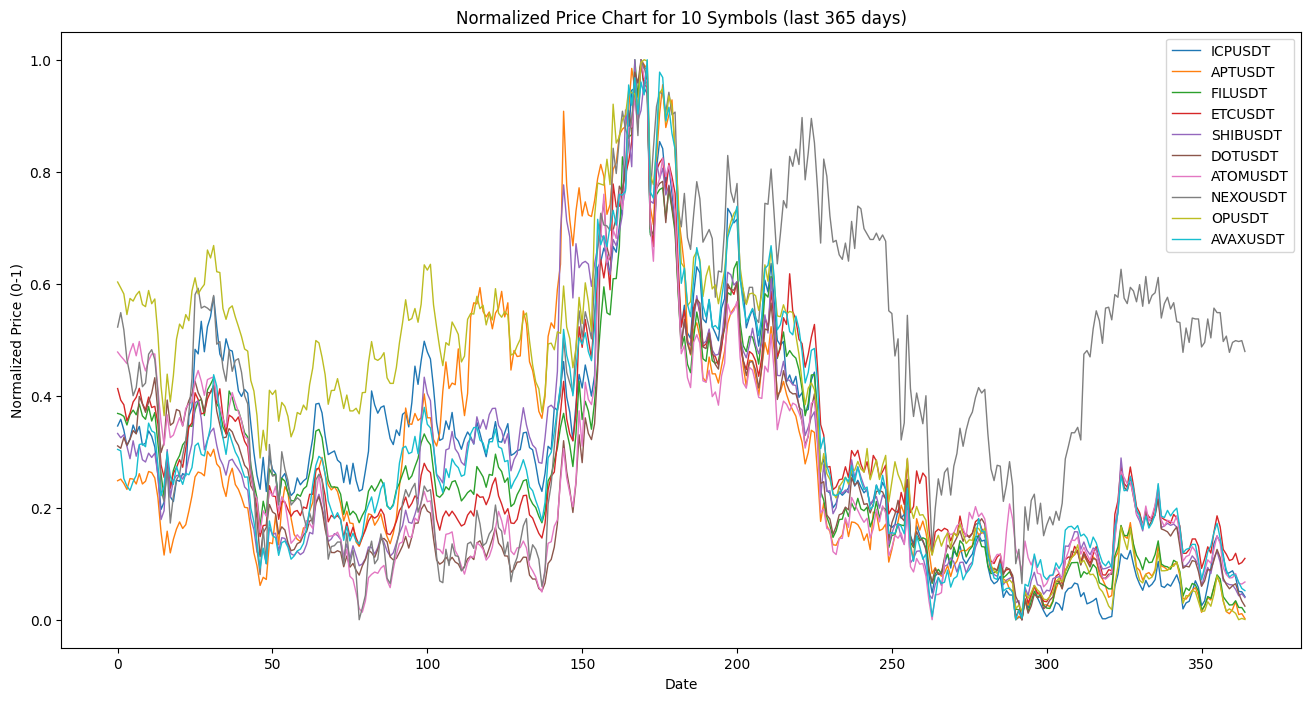

In [15]:
paint_all(df, result, last_days=365)

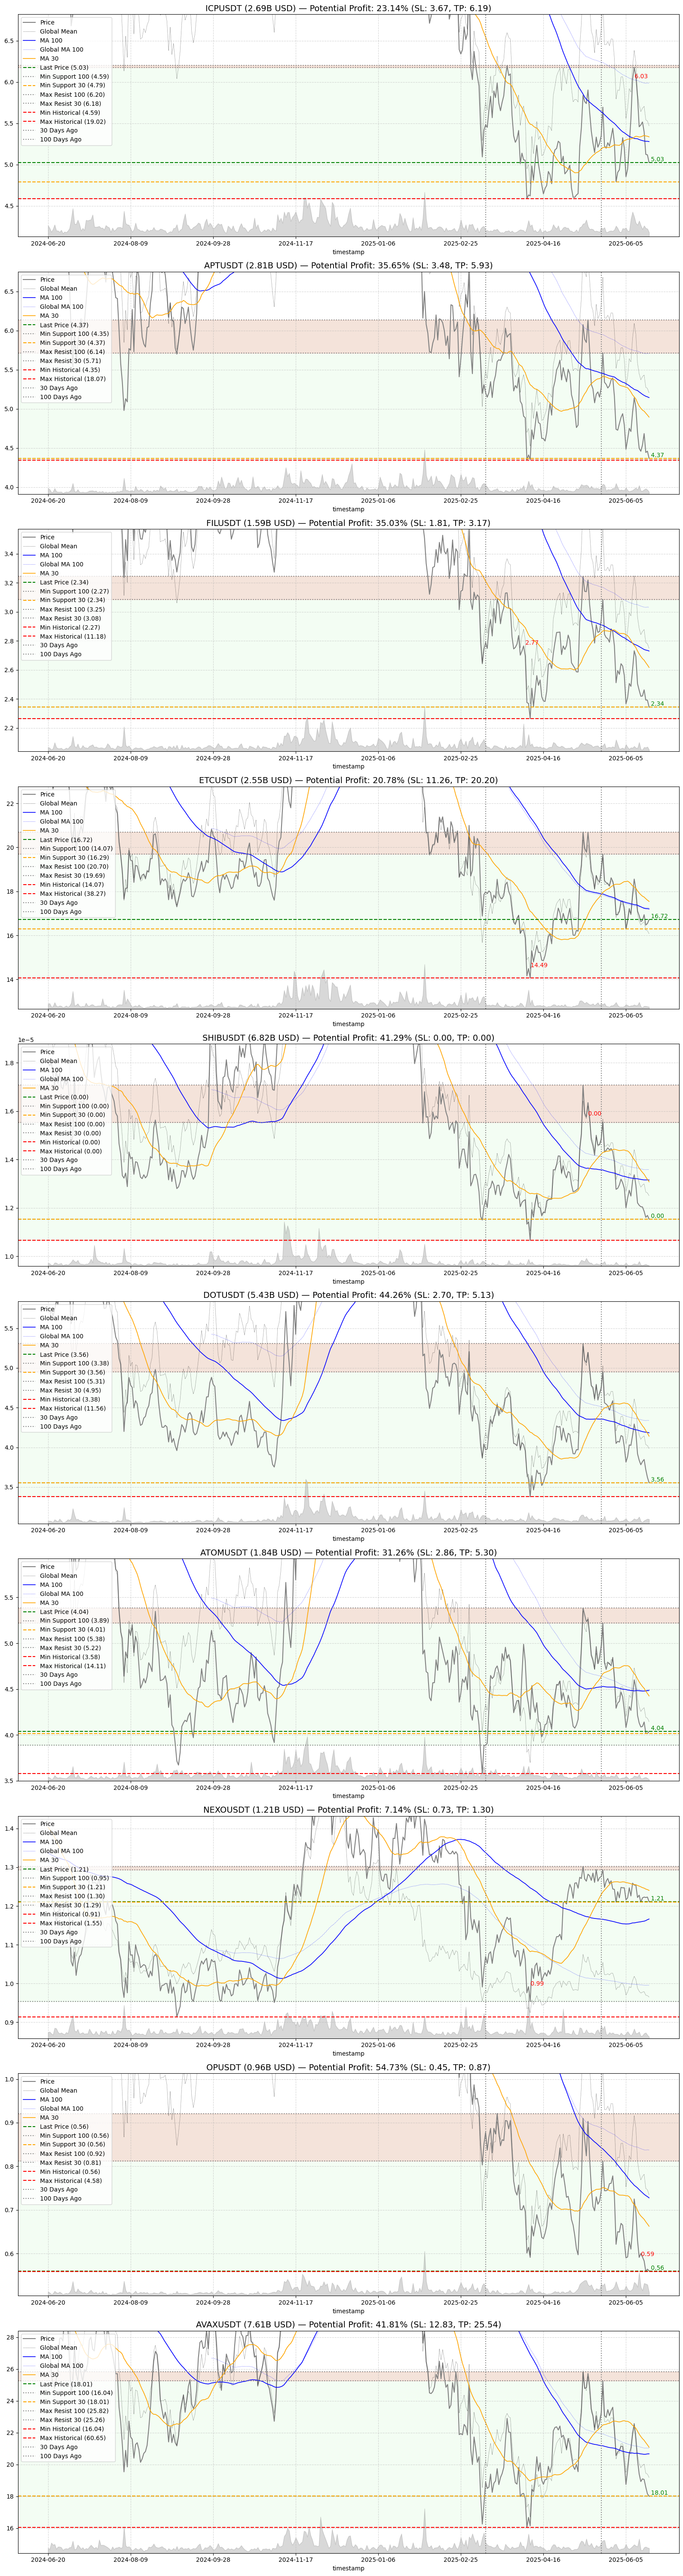

In [16]:
paint_result(df, result, optimal_symbol, cap_df, df_vol, last_days=365)

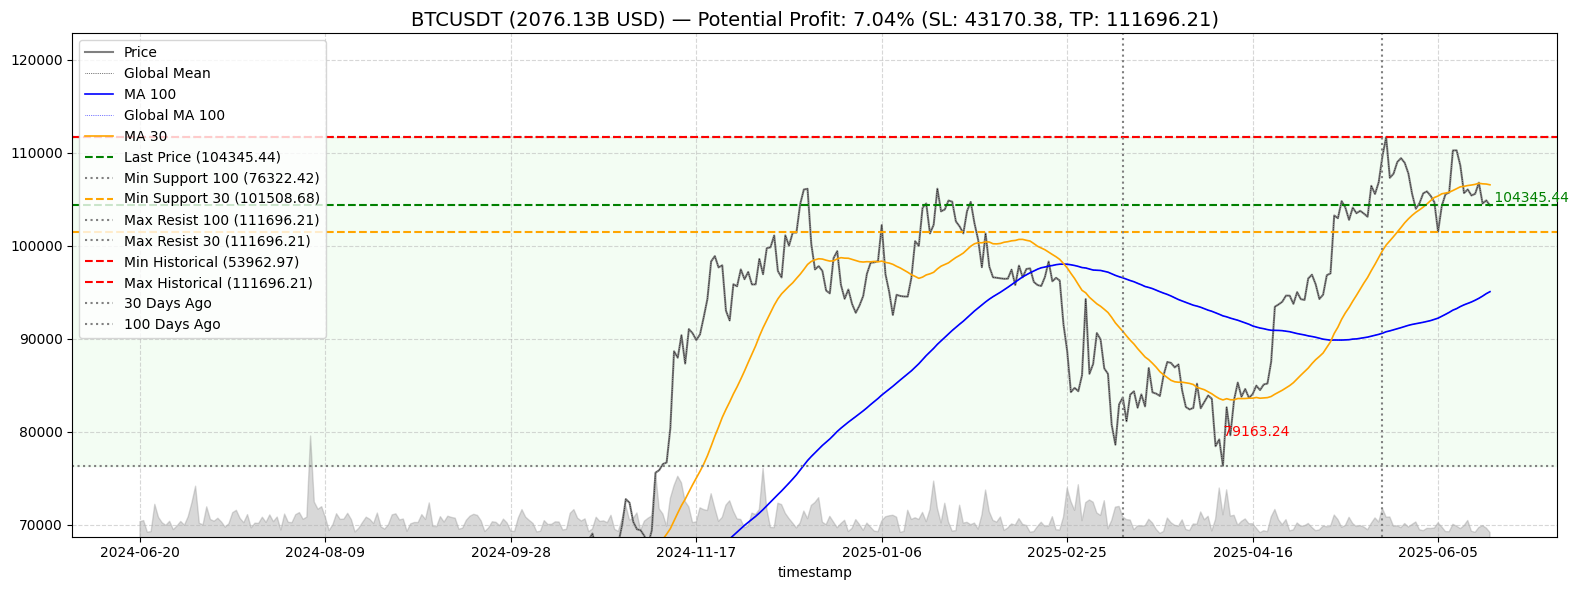

In [17]:
paint_result(df, ['BTCUSDT'], optimal_symbol, cap_df, df_vol, last_days=365)